In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader
import numpy as np

# ----------------------------
# SHAPEFILE
# ----------------------------
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data\TP_SF_T2M_September_20202024_data_stream-moda_stepType-avgad.nc"

lon_min, lon_max = 55, 95
lat_min, lat_max = 5, 40

# None = climatology (mean over years)
# integer = specific year index
time_selector = None


# 1️⃣ CASE–1: Total Precipitation Climatology (MAP)

In [39]:
ds = xr.open_dataset(nc_file)

ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)
)

if time_selector is None:
    tp_plot = ds_reg["tp"].mean("valid_time") * 1000  # m → mm
    title_time = "Climatology (2020–2024)"
else:
    tp_plot = ds_reg["tp"].isel(valid_time=time_selector) * 1000
    title_time = str(tp_plot["valid_time"].values)[:10]


### Plot

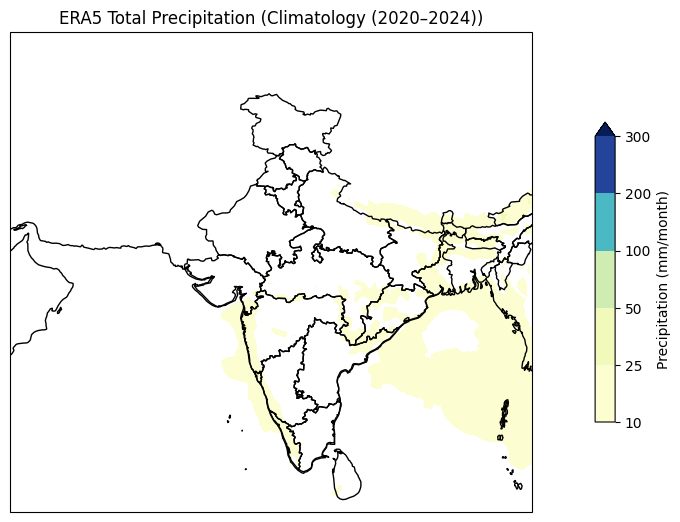

In [40]:
levels = [10, 25, 50, 100, 200, 300]

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.08, 0.1, 0.75, 0.8],
                  projection=ccrs.PlateCarree())

im = ax.contourf(
    tp_plot.longitude,
    tp_plot.latitude,
    tp_plot,
    levels=levels,
    cmap="YlGnBu",
    extend="max"
)

ax.coastlines()
ax.add_geometries(india_geom, ccrs.PlateCarree(),
                  facecolor="none", edgecolor="black")

ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_title(f"ERA5 Total Precipitation ({title_time})")

cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Precipitation (mm/month)")

plt.show()


In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader
import numpy as np
import calendar
import os


In [17]:
# ----------------------------
# PATHS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"

india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

# ----------------------------
# DOMAIN CONTROL
# ----------------------------
lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# ----------------------------
# YEAR RANGE (must match filenames)
# ----------------------------
year_range = "20202024"

# ----------------------------
# COLOR LEVELS (mm/month)
# Works for dry + wet months
# ----------------------------
levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]


In [18]:
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())


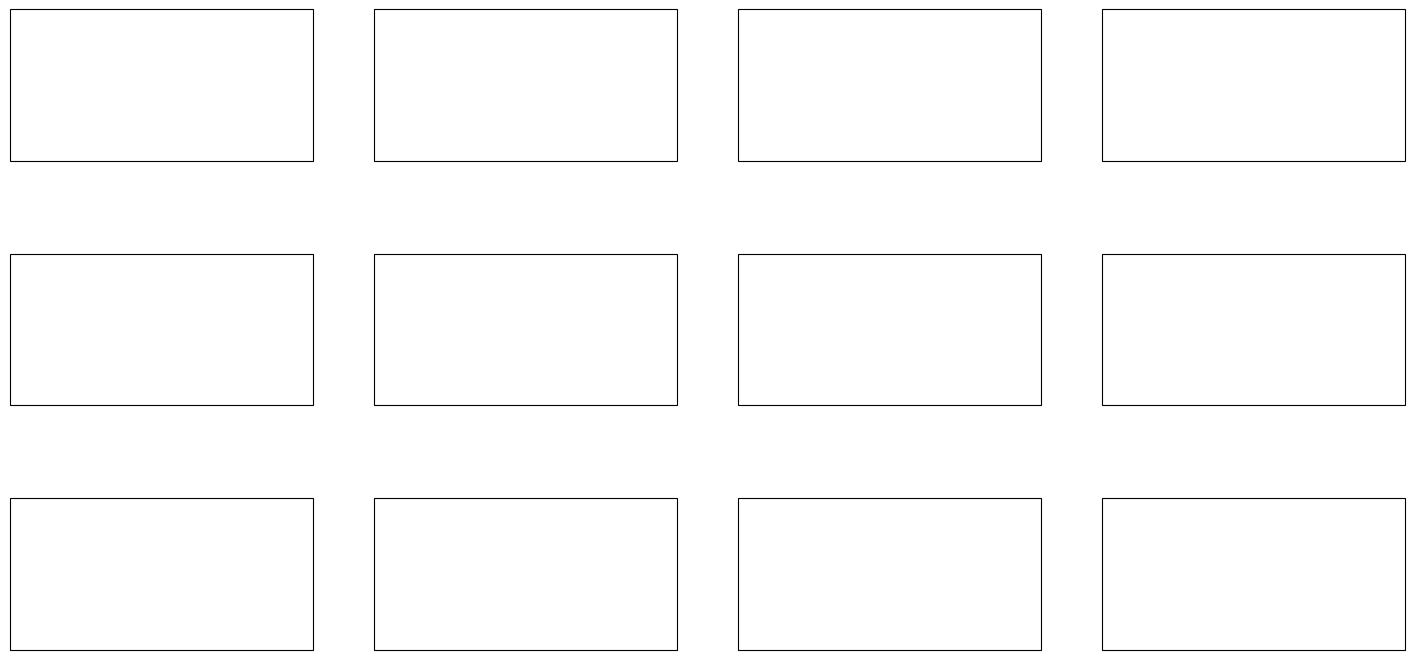

In [23]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()


In [20]:
for m in range(1, 13):

    ax = axes[m - 1]
    mon_name = calendar.month_name[m]

    # ---- construct filename ----
    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon_name}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    # ---- open dataset (NO DOWNLOAD) ----
    ds = xr.open_dataset(nc_file)

    # ---- subset region ----
    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # lat descending
    )

    # ---- climatology over years ----
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    # ---- plot ----
    im = ax.contourf(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        levels=levels,
        cmap="YlGnBu",
        extend="max",
        transform=ccrs.PlateCarree()
    )

    # ---- map features ----
    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    # ---- titles ----
    ax.set_title(mon_name, fontsize=11)

    # ---- clean axes ----
    ax.set_xticks([])
    ax.set_yticks([])


In [21]:
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)
cb.set_label("Total Precipitation (mm/month)", fontsize=11)


In [22]:
fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14,
    y=0.97
)

plt.show()


In [24]:
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]


In [25]:
months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]


In [26]:
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())


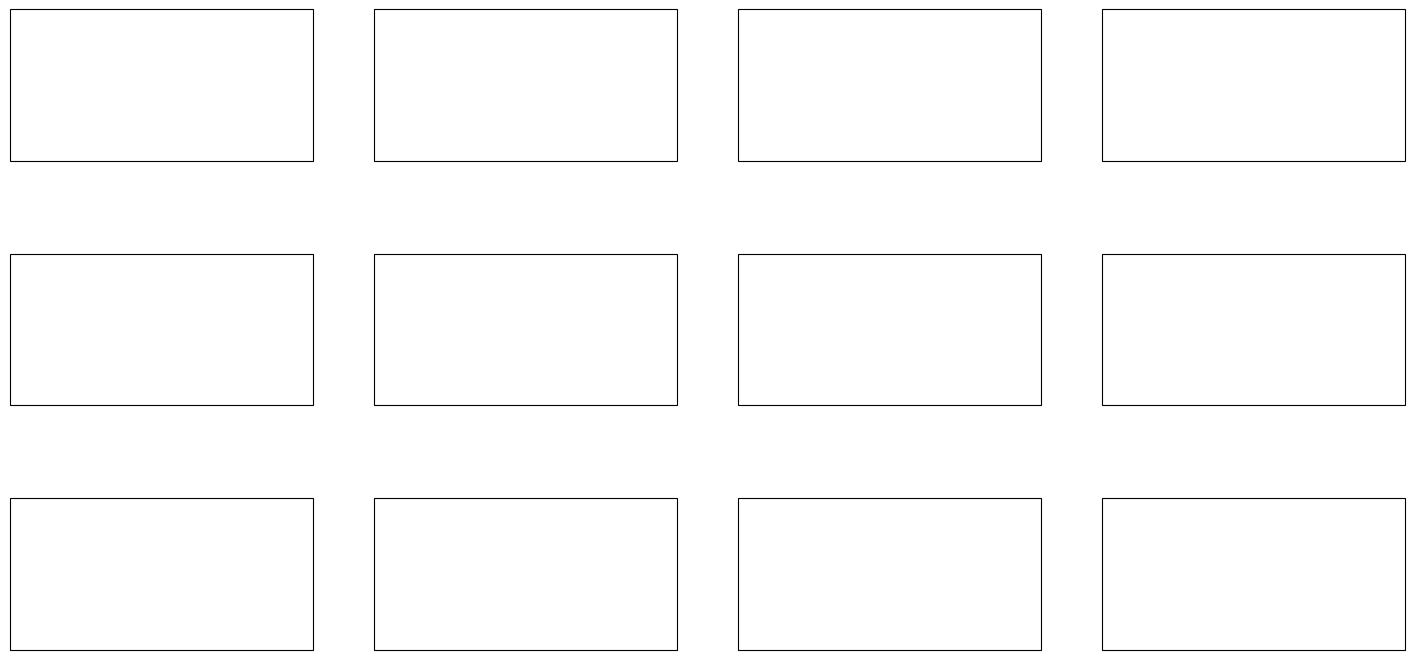

In [28]:
# === ONE CELL ONLY ===

fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

for i, mon_name in enumerate(months):
    ax = axes[i]

    # open file, compute climatology
    # ax.contourf(...)
    # ax.coastlines()
    # ax.set_title(mon_name)

plt.show()


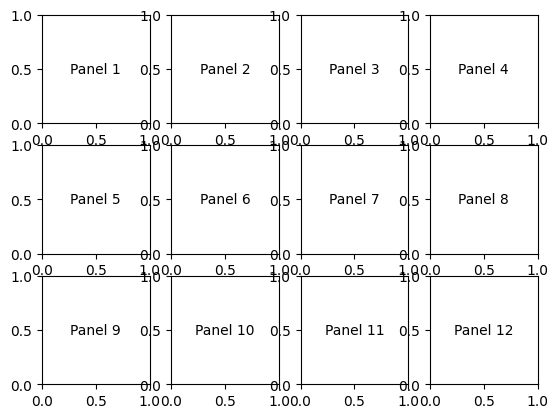

In [29]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()

for i in range(12):
    axes[i].text(0.5, 0.5, f"Panel {i+1}",
                 ha="center", va="center")

plt.show()


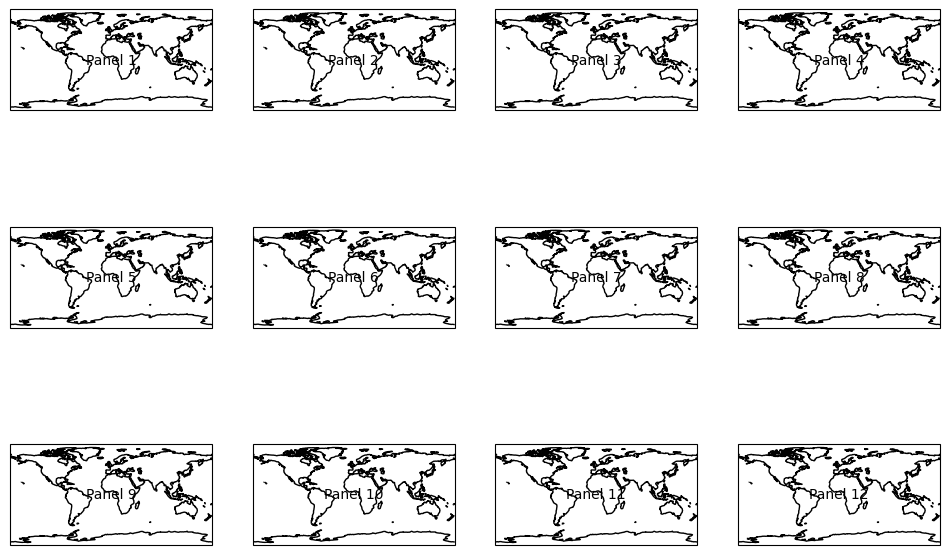

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, axes = plt.subplots(
    3, 4, figsize=(12, 8),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

for i in range(12):
    ax = axes[i]
    ax.text(0.5, 0.5, f"Panel {i+1}",
            transform=ax.transAxes,
            ha="center", va="center")
    ax.coastlines()

plt.show()


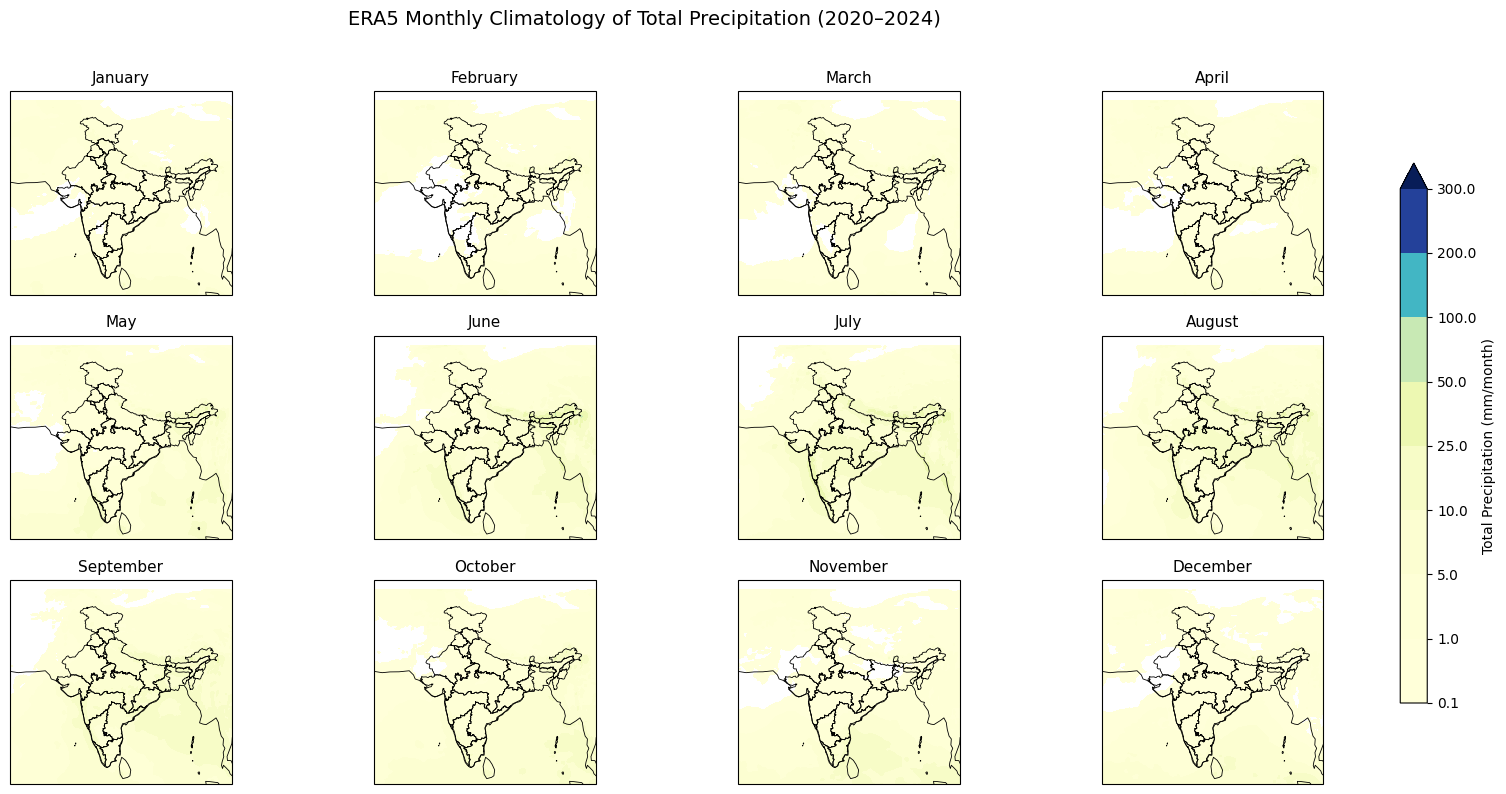

In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    im = ax.contourf(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        levels=levels,
        cmap="YlGnBu",
        extend="max",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)
cb.set_label("Total Precipitation (mm/month)")

fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14, y=0.97
)

plt.show()


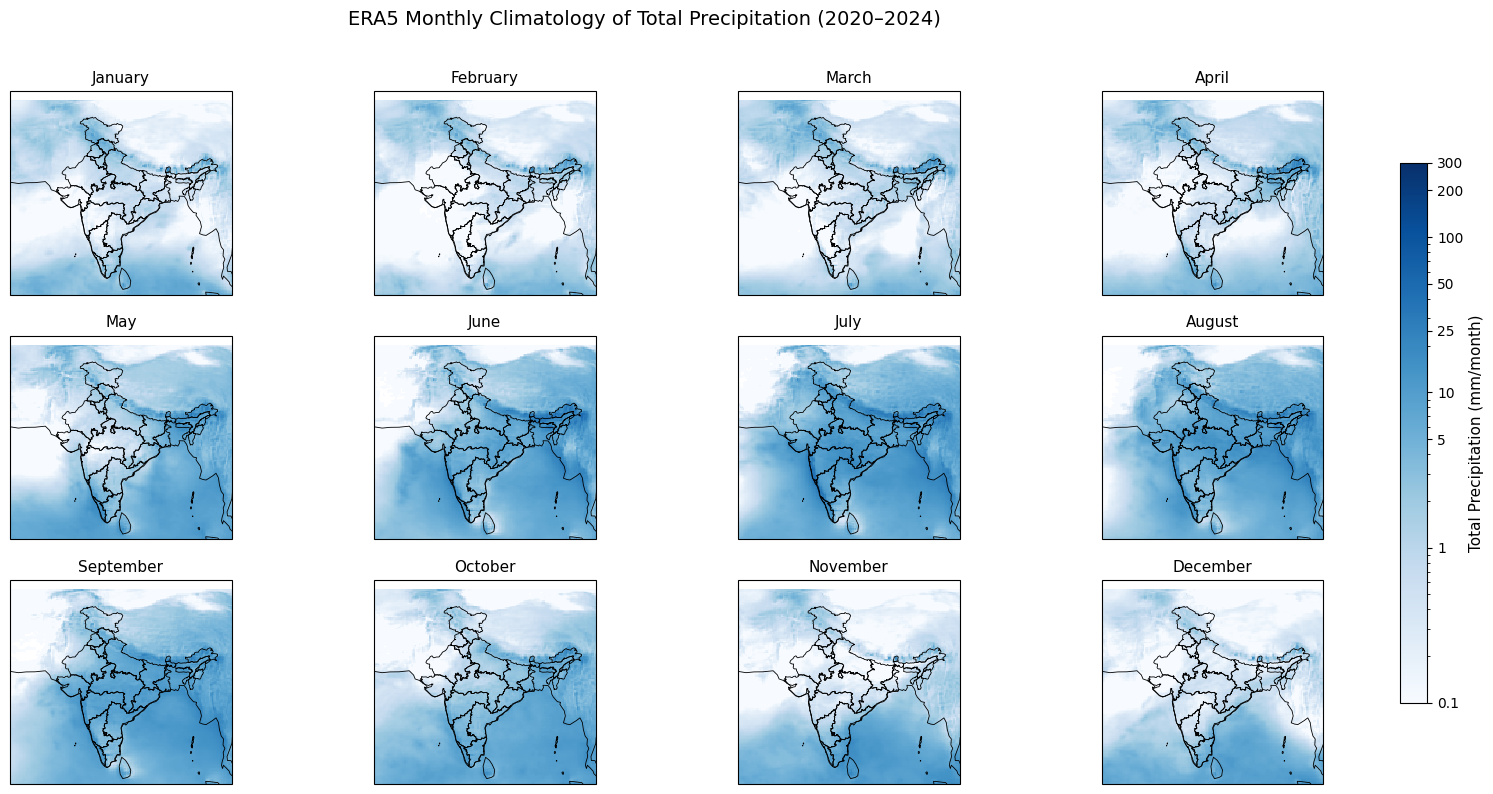

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 300

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Total Precipitation (mm/month)", fontsize=11)
cb.set_ticks([0.1, 1, 5, 10, 25, 50, 100, 200, 300])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "25", "50", "100", "200", "300"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14, y=0.97
)

plt.show()


# Final mean daily precipitation plots=>

In [44]:
print("🔍 Scanning all files to determine global min/max precipitation...")

all_min = np.inf
all_max = -np.inf

for mon in months:
    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    tp = ds_reg["tp"].mean("valid_time") * 1000  # mm/month

    all_min = min(all_min, float(tp.min().values))
    all_max = max(all_max, float(tp.max().values))

print(f"Global min precipitation: {all_min:.3f} mm/month")
print(f"Global max precipitation: {all_max:.3f} mm/month")


🔍 Scanning all files to determine global min/max precipitation...
Global min precipitation: 0.000 mm/month
Global max precipitation: 58.136 mm/month


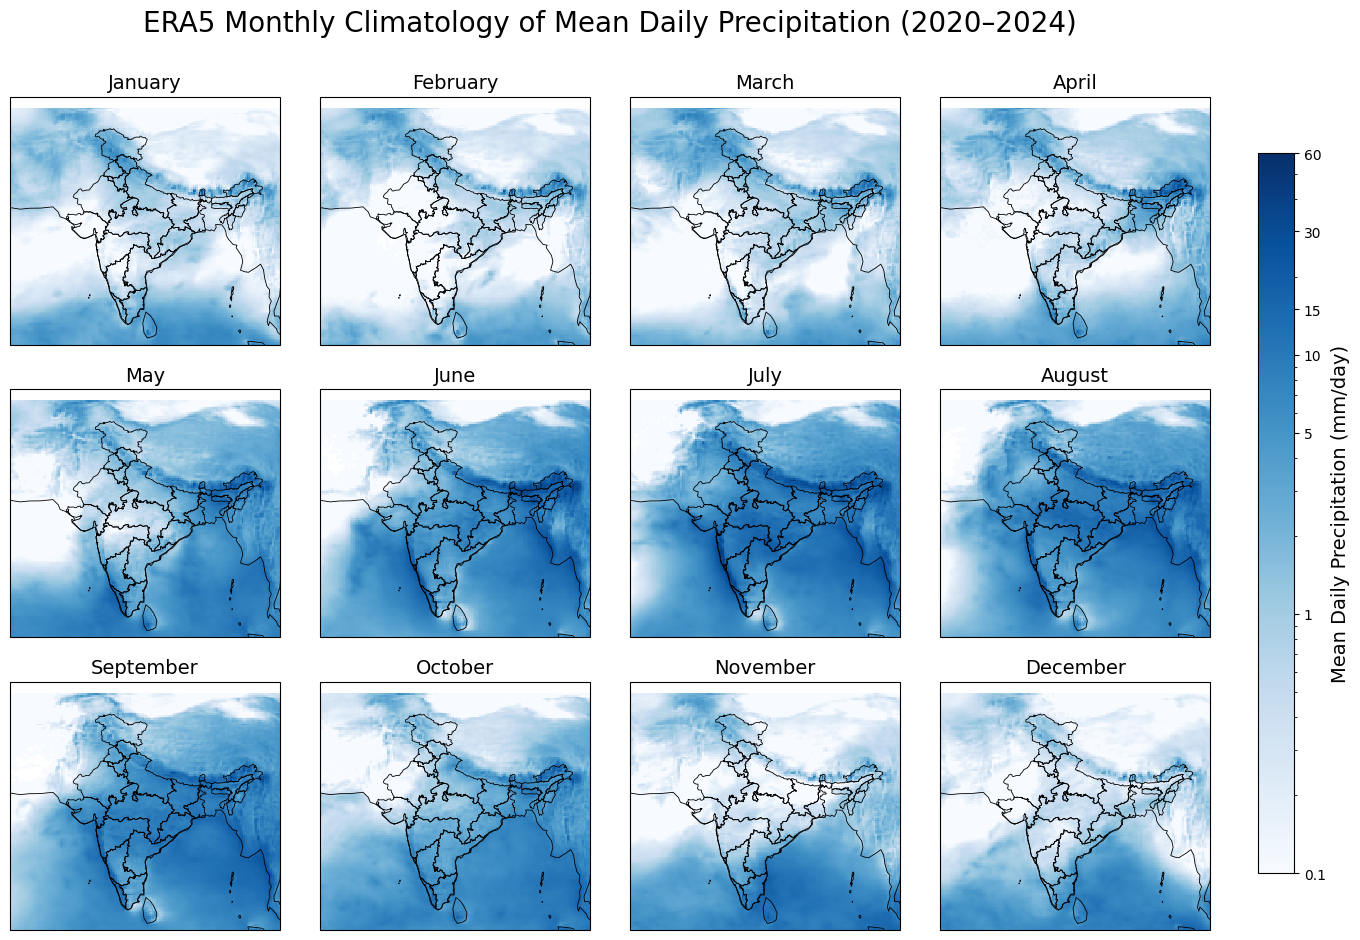

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 60
#vmax = 100

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm
    # Monthly climatology
    #tp_clim = ds_reg["tp"].mean("valid_time") * 1000/30  # m → mm/day

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Precipitation (mm/day)", fontsize=14)
cb.set_ticks([0.1, 1, 5, 10, 15, 30, 60])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "15", "30", "60"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Precipitation (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)


plt.subplots_adjust(
    left=0.4,
    right=0.9,
    top=0.9,
    bottom=0.2,
    wspace=0.15,
    hspace=0.15
)



plt.show()


# Snowfall plotting=>

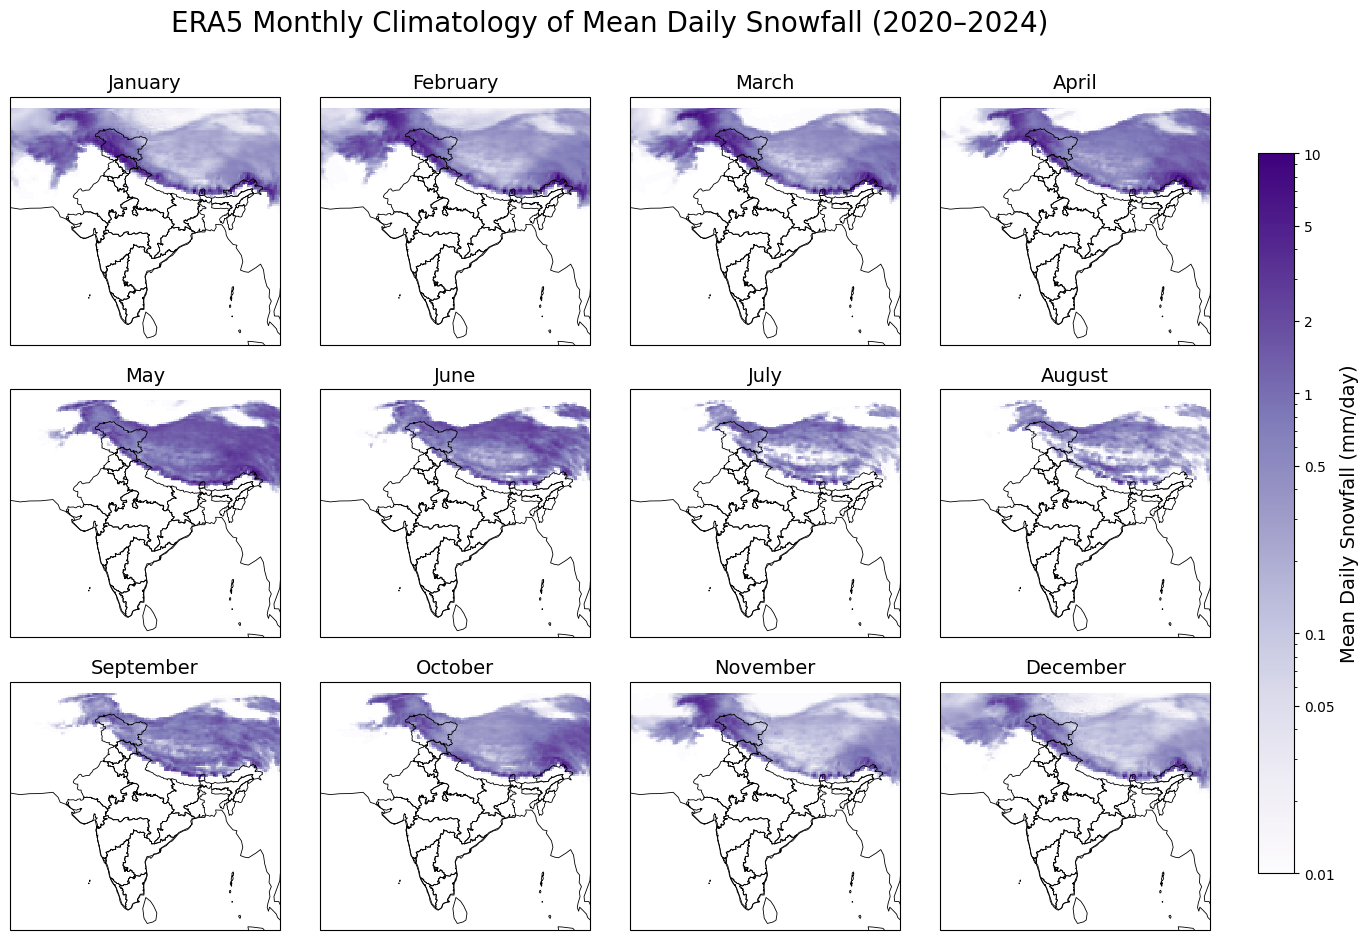

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits for snowfall (mm/day)
vmin = 0.01
vmax = 10

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean daily snowfall climatology (mm/day)
    sf_clim = ds_reg["sf"].mean("valid_time") * 1000

    im = ax.pcolormesh(
        sf_clim.longitude,
        sf_clim.latitude,
        sf_clim,
        cmap="Purples",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Snowfall (mm/day)", fontsize=14)
cb.set_ticks([0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10])
cb.ax.set_yticklabels(["0.01", "0.05", "0.1", "0.5", "1", "2", "5", "10"])

fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Snowfall (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


# Temperature plotting=>

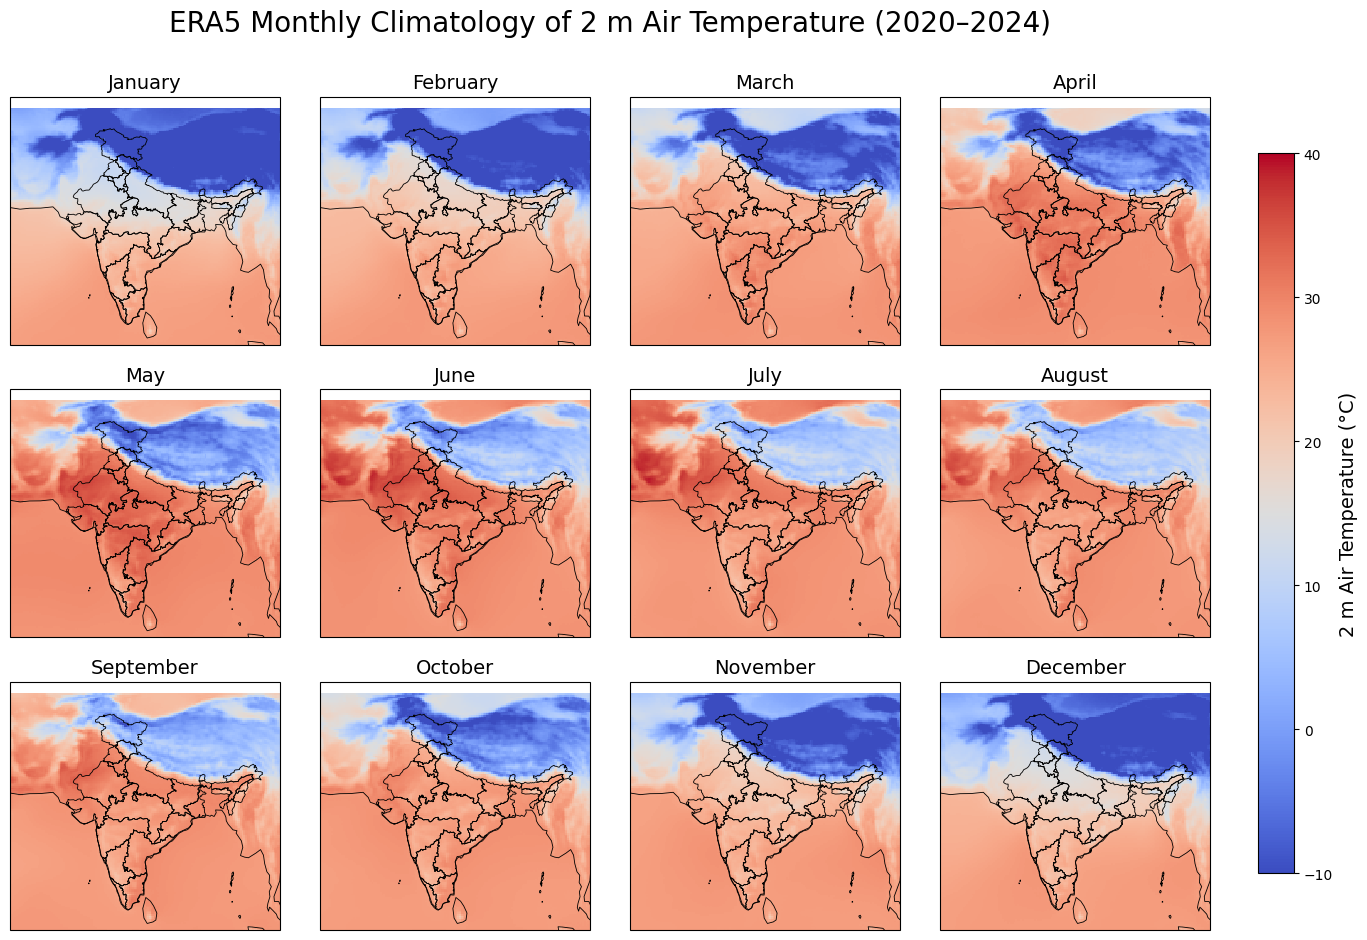

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Temperature limits (°C)
vmin = -10
vmax = 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean 2 m temperature climatology (°C)
    t2m_clim = ds_reg["t2m"].mean("valid_time") - 273.15

    im = ax.pcolormesh(
        t2m_clim.longitude,
        t2m_clim.latitude,
        t2m_clim,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("2 m Air Temperature (°C)", fontsize=14)
cb.set_ticks([-10, 0, 10, 20, 30, 40])

fig.suptitle(
    "ERA5 Monthly Climatology of 2 m Air Temperature (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()
